# Settings

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# 본인 구글 드라이브에 업로드한 heart.csv 파일의 주소를 넣어주세요!
heart = pd.read_csv('/content/drive/MyDrive/KUBIG/머신러닝/Homework/3주차/heart.csv')


# About Dataset
Age : Age of the patient

Sex : Sex of the patient

cp : Chest Pain type chest pain type  
 - Value 1: typical angina  
 - Value 2: atypical angina  
 - Value 3: non-anginal pain  
 - Value 4: asymptomatic  

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results  
 - Value 0: normal
 - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalachh : maximum heart rate achieved

exng: exercise induced angina (1 = yes; 0 = no)

oldpeak : previous peak

slp : slope

caa: number of major vessels (0-3)

thall : Thal rate

output : 0= less chance of heart attack 1= more chance of heart attack

# 1. EDA

In [6]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# data shape
heart.shape

(303, 14)

In [8]:
heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
# checking number of unique value
unique_heart = pd.DataFrame(index = heart.columns, columns = ['unique count'])

for i in list(heart.columns):
  unique_heart.loc[i,'unique count'] = heart[i].value_counts().shape[0]

unique_heart

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


## Seperating the columns by categorical and numerical

In [10]:
# Seperating the columns by categorical and numerical
cat_cols = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
num_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

Separate categorical and numerical values.
Target variable is "output"

In [11]:
# numerical statistics
heart[num_cols].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


Summary statistics for numerical variables

In [12]:
# missing value
heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Number of missing values per variable.
As we can see, there are no missing values.

## Visualization

### categorical plotting

In [13]:
cat_cols

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

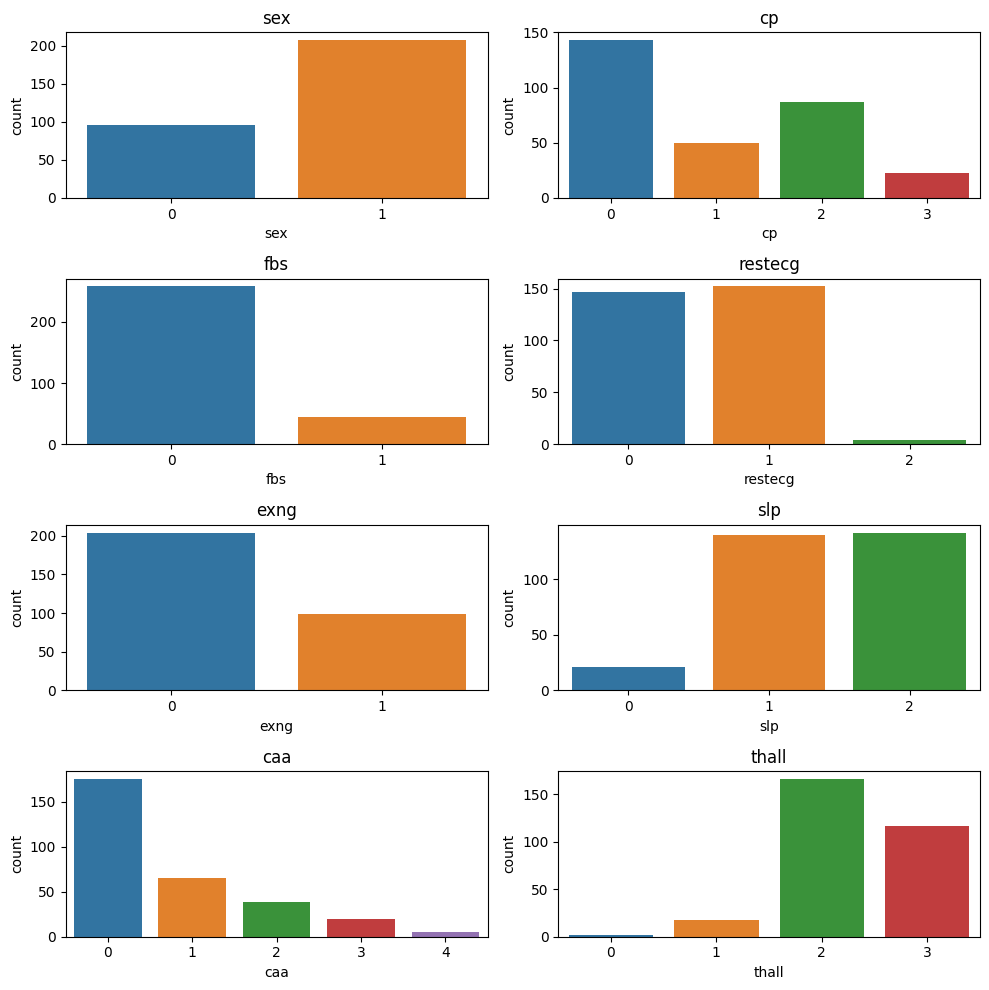

In [14]:
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
  sns.countplot(data = heart, x = cat_cols[i], ax = ax)
  ax.set_title(f'{cat_cols[i]}')

plt.tight_layout()
plt.show()

### numerical plotting

In [15]:
num_cols

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

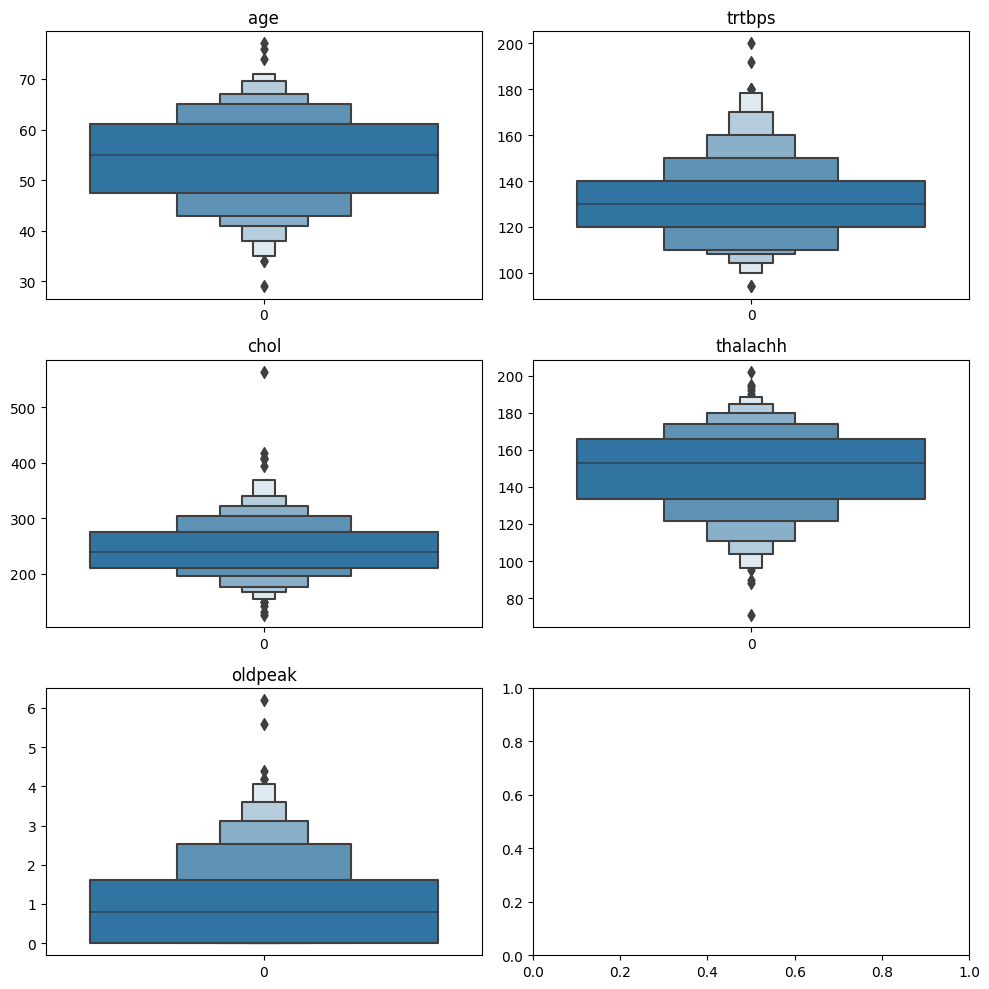

In [16]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
  if i == 5:
    break
  sns.boxenplot(heart[num_cols[i]], ax = ax)
  ax.set_title(f'{num_cols[i]}')


plt.tight_layout()
plt.show()

### target plotting

<Axes: xlabel='output', ylabel='count'>

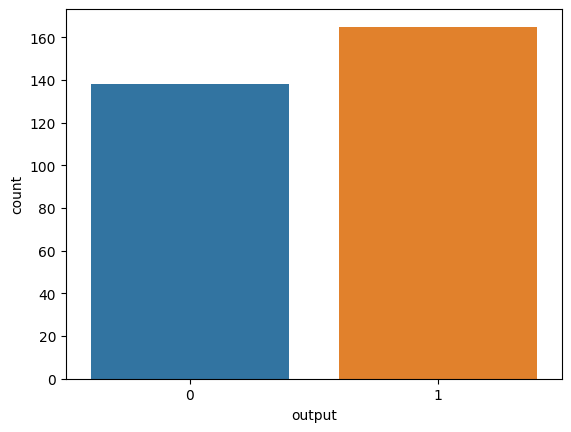

In [17]:
sns.countplot(data = heart,x = 'output')

## correlation matrix

<Axes: >

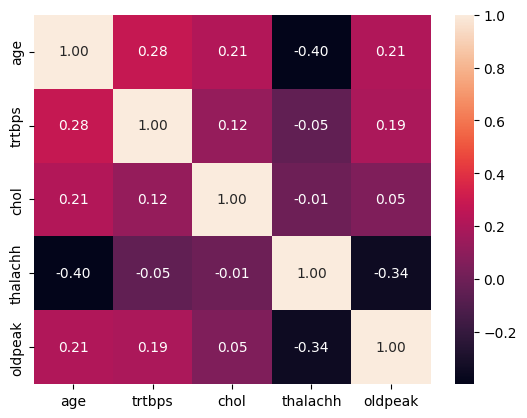

In [18]:
# numerical
heart_corr = heart[num_cols].corr()
sns.heatmap(heart_corr, fmt='.2f',annot = True)

<Axes: >

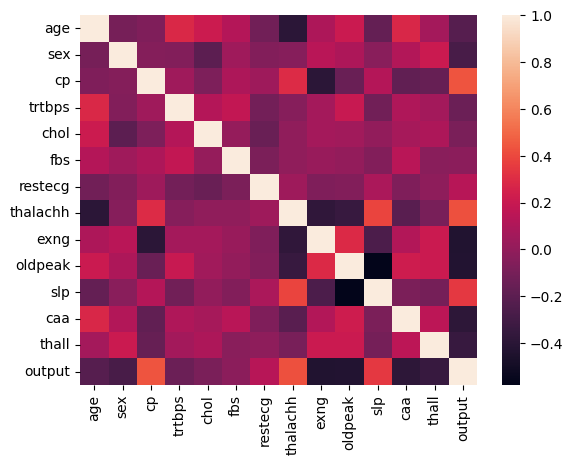

In [19]:
# all
heart_corr = heart.corr()
sns.heatmap(heart_corr, fmt='.2f',annot = False)

# preprocessing

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
prep_heart = heart.copy()

# encoding categorical features
prep_heart = pd.get_dummies(prep_heart, columns = cat_cols, drop_first = True)

# scaling
scaler = StandardScaler()
prep_heart[num_cols] = scaler.fit_transform(prep_heart[num_cols])

# split X,y
X = prep_heart.drop(['output'], axis = 1)
y = prep_heart['output']

Let's see how the outcomes look like

In [22]:
prep_heart

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,1,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [23]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

Let's check what datatypes these variables are for use of next question.

In [27]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


# Training

## Logistic Regression

### Q1. 아래 시그모이드 함수를 구현하세요

$\sigma(z) = \frac{1}{1 + e^{-z}}$


Reference:
https://stackoverflow.com/questions/34000074/pandas-return-column-of-exponential-values

In [32]:
# Sigmoid 함수 정의
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [33]:
print(sigmoid(0))
print(sigmoid(5))

0.5
0.9933071490757153


### Q.2 Cross Entropy를 구현하세요.

Reference:
https://stackoverflow.com/questions/67615051/implementing-binary-cross-entropy-loss-gives-different-answer-than-tensorflows

In [34]:
# Binary Cross Entropy 정의
def BCE(y,y_pred):
  term0 = (1-y)*np.log(1-y_pred)
  term1 = y*np.log(y_pred)
  return -np.mean(term0 + term1, axis = 0)

### Logistic Regression Model

In [35]:
# Logistic Regression model
def logistic_regression(X, y, num_iterations, learning_rate):
    num_features = X.shape[1]
    weights = np.zeros(num_features)
    cost_history = []

    for i in range(num_iterations):
        z = np.dot(X, weights)
        y_pred = sigmoid(z)

        # Loss function
        cost = BCE(y,y_pred)
        cost_history.append(cost)

        gradient = np.dot(X.T, (y_pred - y)) / len(y)
        weights -= learning_rate * gradient

    return weights, cost_history

In [36]:
num_iterations = 10000
learning_rate = 0.01

weights, cost_history = logistic_regression(X_train, y_train, num_iterations, learning_rate)

print('Weights:', weights)
print('Final Cost:', cost_history[-1])

Weights: [ 0.05293664 -0.26835092 -0.07852607  0.33638329 -0.65871575 -0.91677142
  0.49887133  1.43812678  1.09054531  0.34738847  0.47143751  0.02420021
 -0.85299467 -0.13433424  0.7364544  -1.59062778 -1.42950524 -0.73335733
  0.25806157  0.26849969  0.98642513 -0.53499428]
Final Cost: 0.32138684149132635


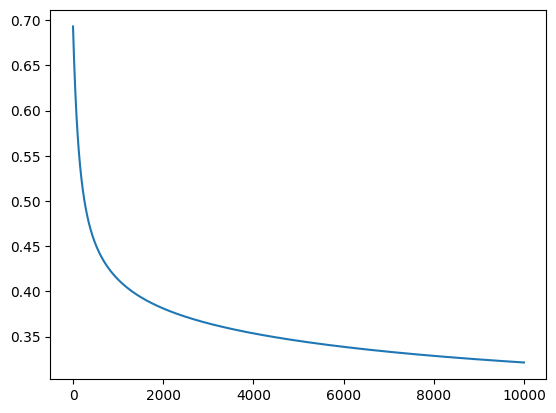

In [37]:
plt.plot(cost_history)

In [38]:
# Predict test data
z = np.dot(X_test, weights)
y_pred = np.round(sigmoid(z))

In [39]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve

In [40]:
accuracy_score(y_test, y_pred)

0.8852459016393442

## KNN classification

### Q3. 거리 계산 함수에 대해 구현해보세요

Euclidean: https://www.geeksforgeeks.org/calculate-the-euclidean-distance-using-numpy/

Manhattan: https://stackoverflow.com/questions/62634025/manhattan-distance-between-2-vectors

In [42]:
# def euclidean_distance(x1, x2):
#   return np.linalg.norm(x1-x2)

def euclidean_distance(x1, x2):
  temp = x1 - x2
  sum_sq = np.dot(temp.T, temp)
  return np.sqrt(sum_sq)


def manhattan_distance(x1, x2):
  return np.abs(x1-x2).sum()

In [43]:
# KNN 분류기 구현
def KNN(X_train, y_train, X_test, k):
    y_pred = []

    for test_sample in X_test.values:
        distances = [euclidean_distance(test_sample, train_sample) for train_sample in X_train.values]
        sorted_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train.iloc[sorted_indices]
        unique_labels, label_counts = np.unique(k_nearest_labels, return_counts=True)
        predicted_label = unique_labels[np.argmax(label_counts)]
        y_pred.append(predicted_label)

    return np.array(y_pred)

In [44]:
k = 5
y_pred = KNN(X_train, y_train, X_test, k)

In [45]:
accuracy_score(y_test, y_pred)

0.8524590163934426

# Q4. sklearn의 Decision Tree를 사용해서 classification을 진행해보세요!

Reference: https://datagy.io/sklearn-decision-tree-classifier/

In [63]:
from sklearn.tree import DecisionTreeClassifier
# Define Classifier
clf = DecisionTreeClassifier()
# Learn model
clf.fit(X_train, y_train)
# Predictions in test set
y_pred = clf.predict(X_test)

In [64]:
print(y_test)
print(y_pred)

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: output, Length: 61, dtype: int64
[0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0]


## Q5. 모델의 학습 결과에 대한 ROC curve를 그리고 AUC 값을 출력해보세요!

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

In [68]:
accuracy_score(y_test, y_pred)

0.7704918032786885

In [ ]:
# Prediction prob
y_prob = model_LR.predict_proba(X_test)[:,1]

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label = 'ROC curve')
plt.show()

# AUC
print('AUC : {}'.format(roc_auc_score(y_test, y_prob)))

predict_proba returns only 0 or 1
https://stackoverflow.com/questions/48219986/decisiontreeclassifier-predict-proba-returns-0-or-1

[0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0.]


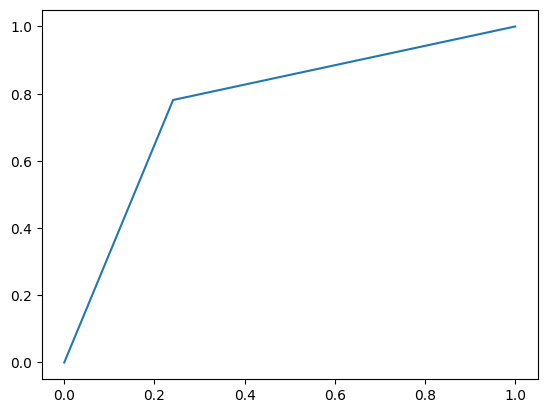

0.7699353448275862


In [70]:
# calculating probability
y_prob = clf.predict_proba(X_test)[:,1]
print(y_prob)

# AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label = 'ROC curve')
plt.show()

# ROC curve
print(roc_auc_score(y_test, y_prob))

## Q6. Plot_tree를 이용해서 decision tree의 결과를 확인해 봅시다.

In [73]:
from sklearn.tree import plot_tree

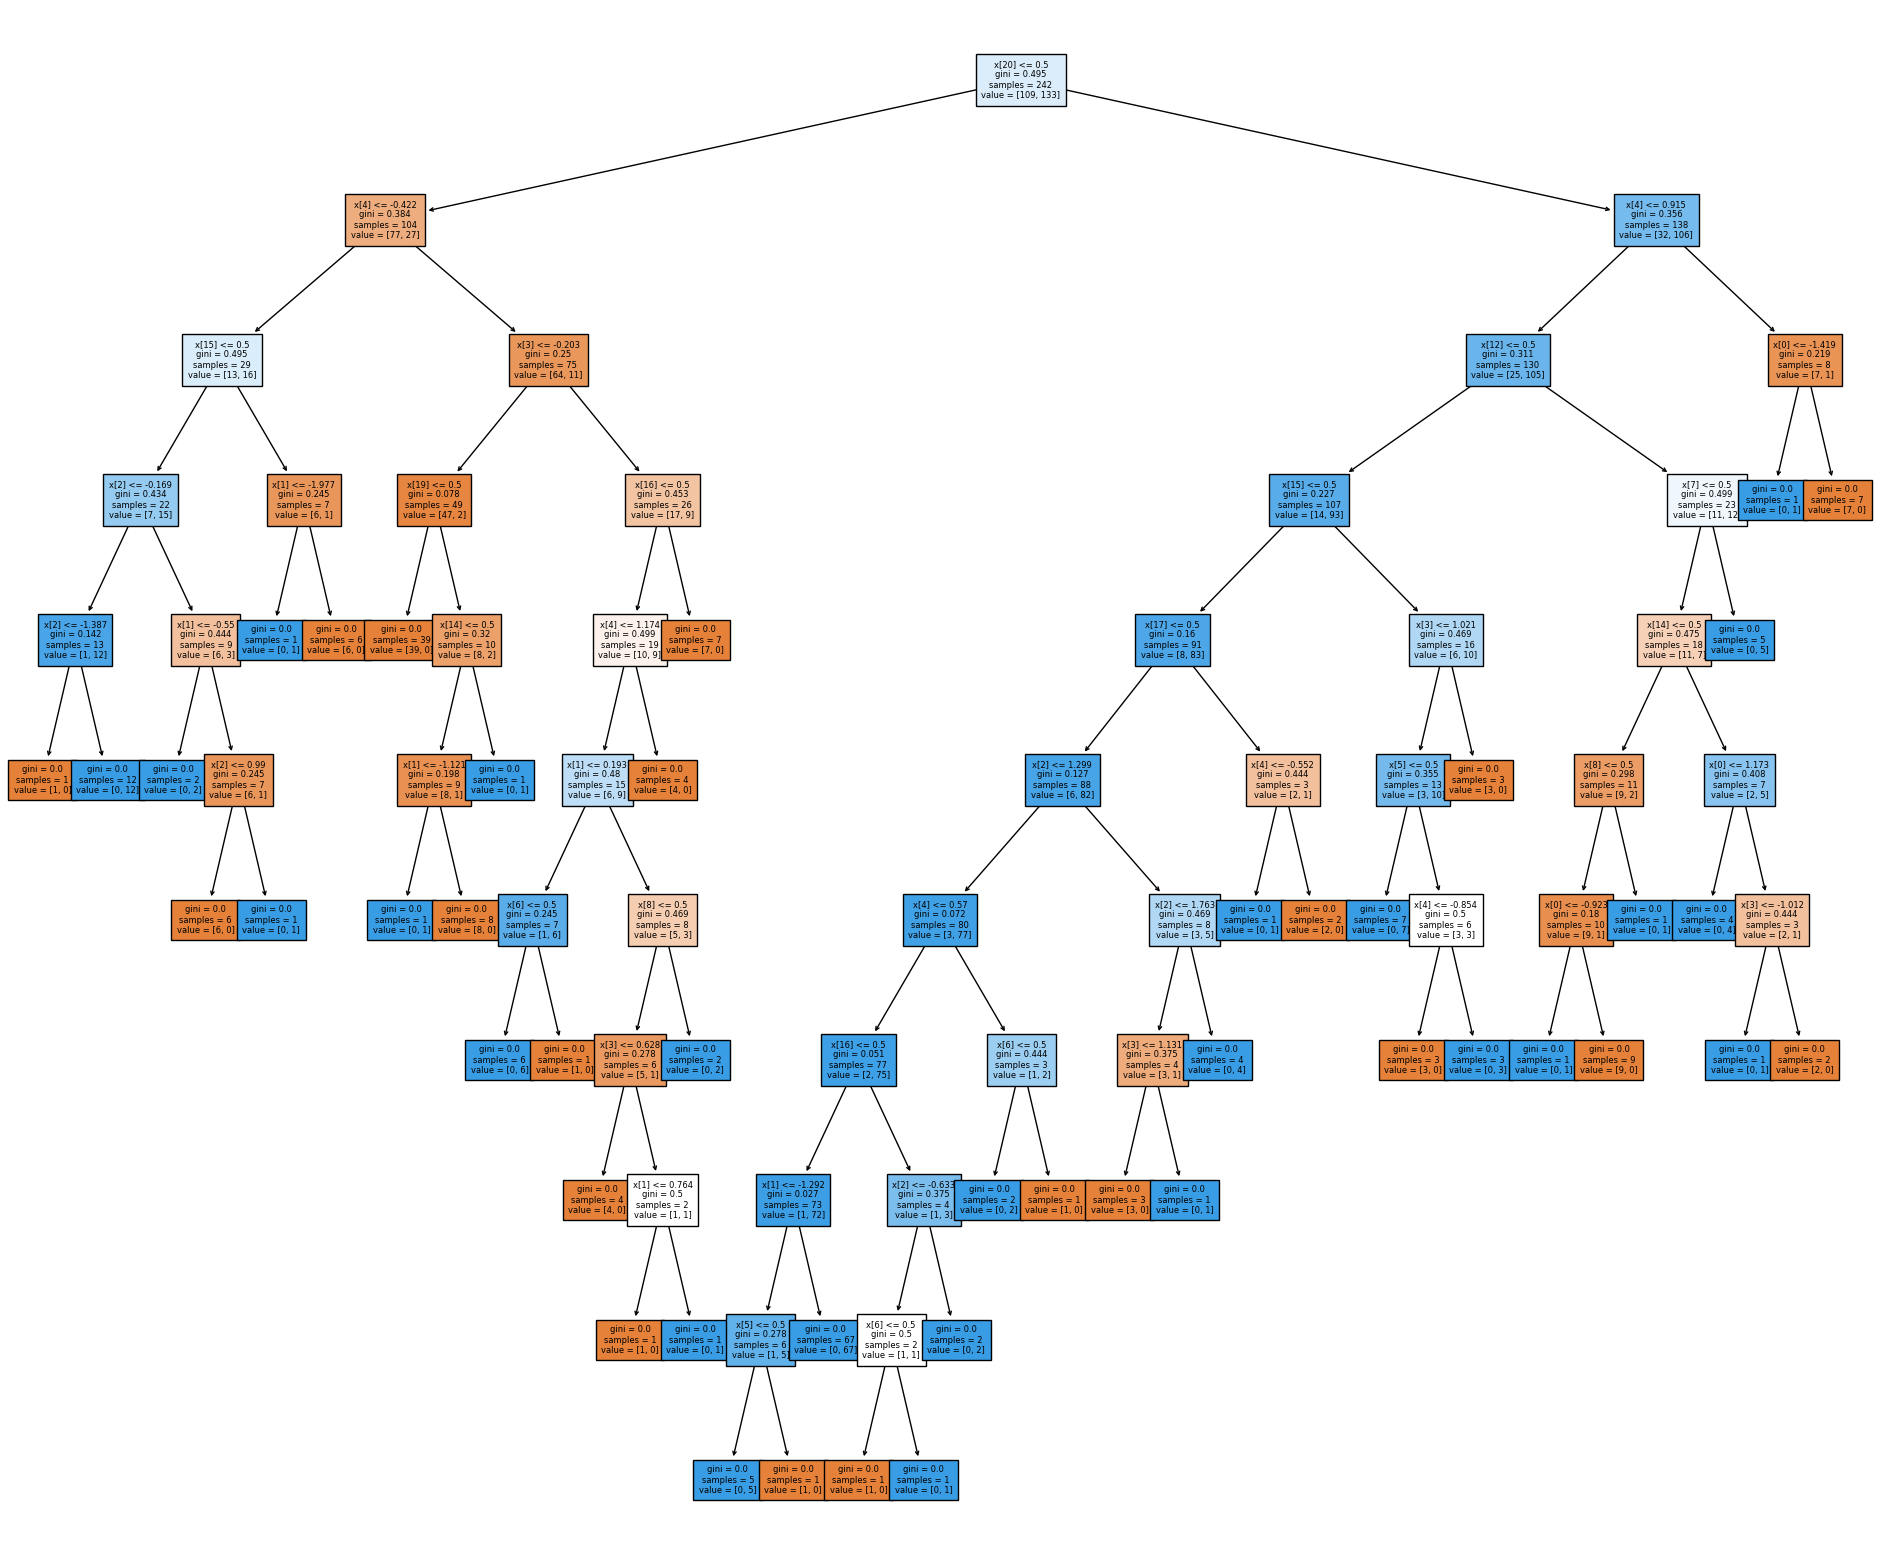

In [80]:
plt.figure(figsize = (24, 20))
plot_tree(clf, filled = True, fontsize = 6)
plt.show()

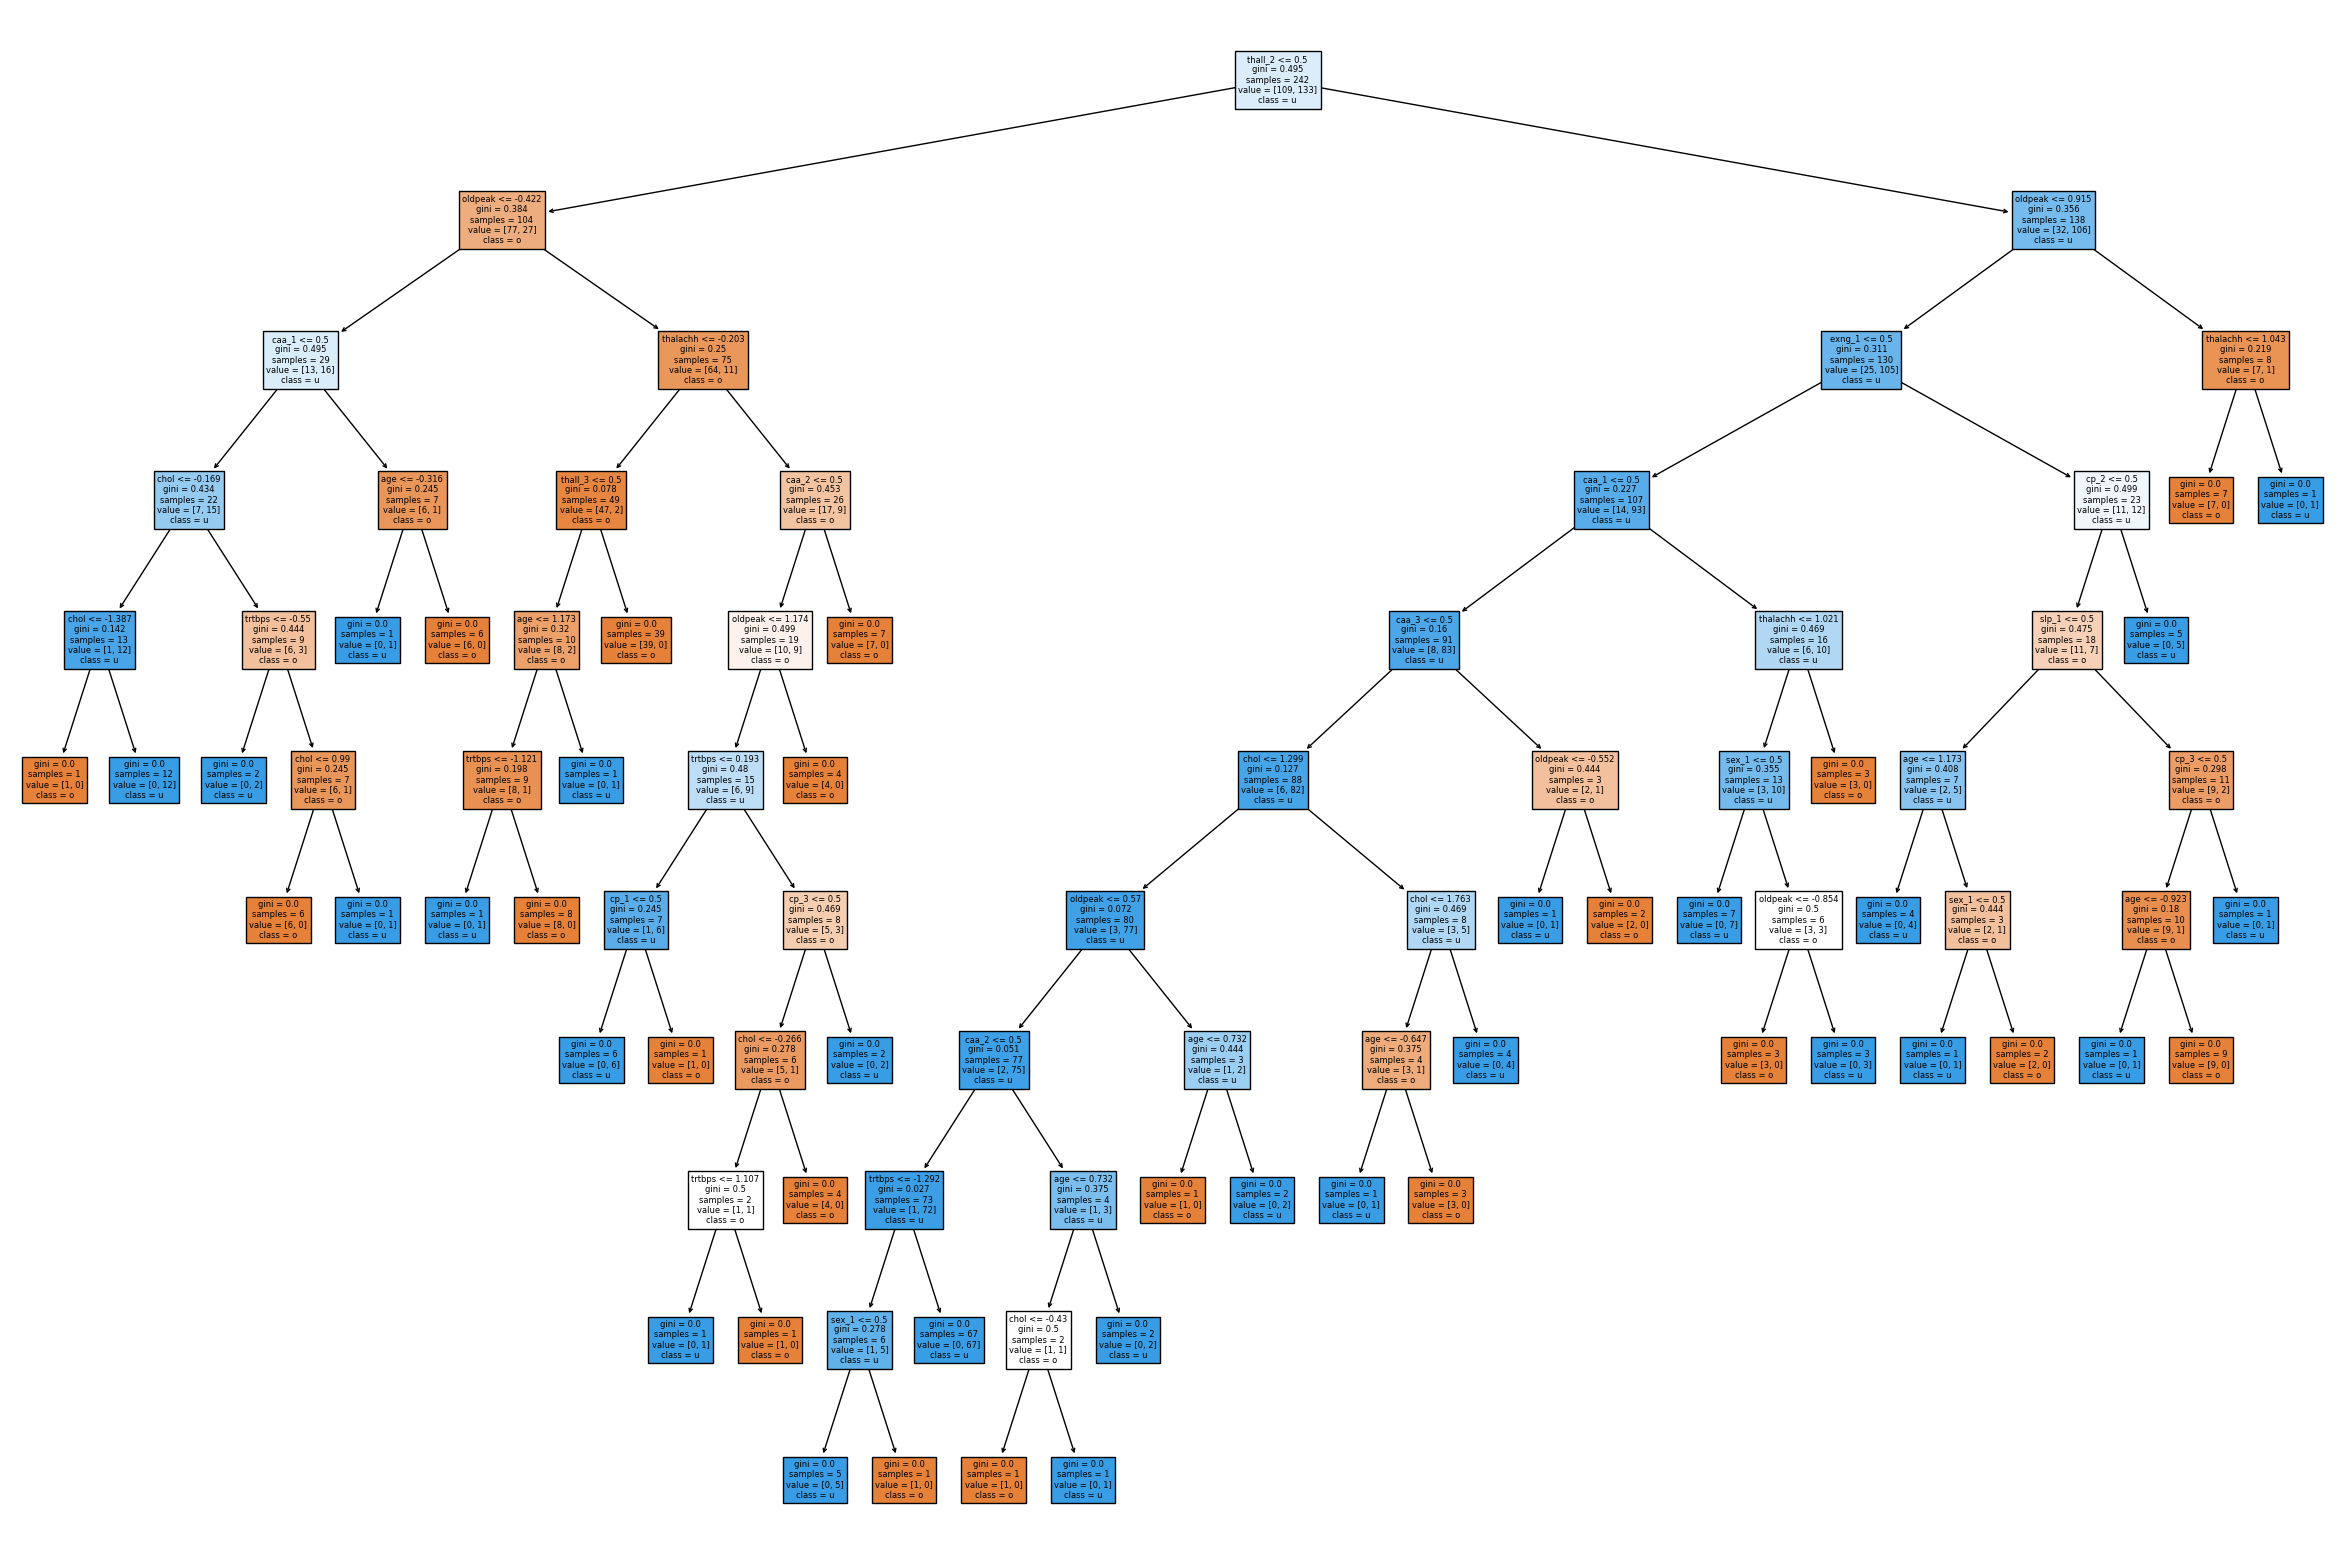